In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (20, 8)

In [3]:
iris = load_iris()

df = pd.DataFrame(data = np.hstack([iris["data"], iris["target"].reshape(-1, 1)]), 
             columns = [x[:-5].replace(" ", "_") for x in iris["feature_names"]] + ["type"])

df["type"] = np.int32(df["type"])

del iris

df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splitting Data

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values, 
                                                    df["type"].values, 
                                                    test_size=0.33, 
                                                    random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


## Utility Functions

In [5]:
def entropy(x):
    p = np.array(list(Counter(x).values()))
    p = p/np.sum(p)
    return -np.sum(np.log2(p)*p)

In [6]:
info_gain = lambda x, ys: entropy(x) - sum([sum(y)*entropy(x[y])/len(x) for y in ys])

In [7]:
class Tree:
    def __init__(self, bins = 5, depth=3):
        self.head = None
        self.arg_value = None
        self.children = []
        self.bins = bins
        self.depth = depth
    
    def fit(self, X, Y):
        best_arg = 0
        arg_val = None
        gain = -1

        # Iterating Over all Parameters
        for x in range(X.shape[1]):
            bins = np.arange(X[:,x].min(), X[:,x].max(), (X[:,x].max() - X[:,x].min())/self.bins)

            # Calculating Informtion Gain for Each Split.
            for i in range(len(bins)-1):
                p_gain = info_gain(Y, [bins[i]<=Y, Y<bins[i+1]])

                if gain < p_gain:
                    gain = p_gain
                    best_arg = x
                    arg_val = bins[i+1]


        self.head = best_arg
        self.arg_value = arg_val
        if self.depth > 1:
            self.children = [Tree(depth=self.depth-1), Tree(depth=self.depth-1)]
            idx = X[:, best_arg]<arg_val
            self.children[0].fit(X[idx], Y[idx])
            self.children[1].fit(X[~idx], Y[~idx])

## Model Construction

In [8]:
obj = Tree()

In [9]:
obj.fit(x_train, y_train)

## Model Visualization

I've wriiten code for a binary decision tree. So each left child operates on values samller than argument value shown in title and right child operates on values greater or equal to argument value shown in title. The hierarchy is as follow

$$\text{Parent}$$
$$\big/ \ \ \setminus $$
$$\text{Child 1}\ \ \ \ \ \ \ \ \text{Child 2}$$
$$\big/ \ \ \ \ \ \ \ \ \setminus \ \ \ \ \ \  \big/ \ \ \ \ \ \ \ \ \setminus$$
$$\text{GC 11}\ \ \ \text{GC 12}\ \ \ \text{GC 21}\ \ \ \text{GC 22}$$



Here decison boundry of each child is reprented by a different colour.

In [10]:
cols = df.columns

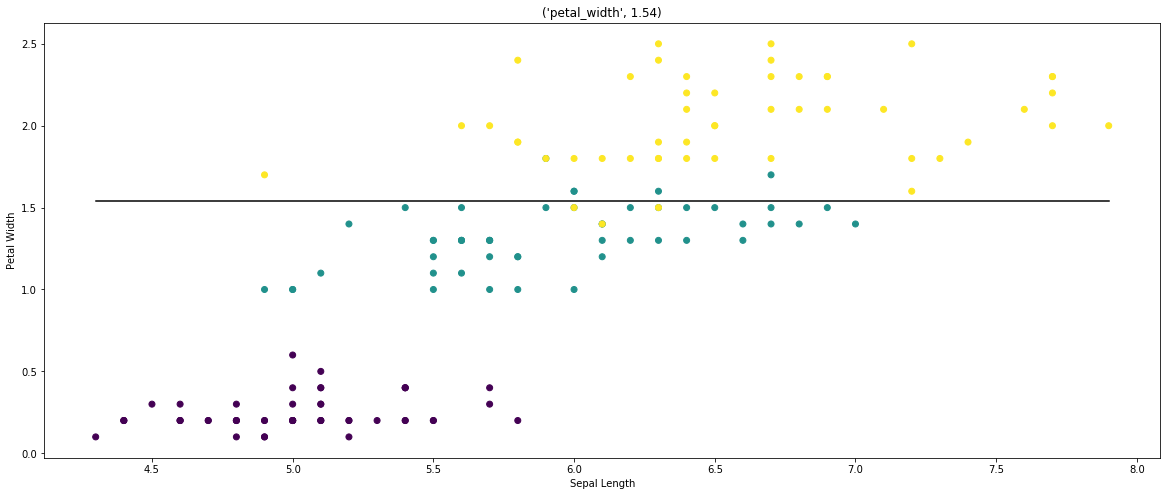

In [11]:
# Parent

plt.title((cols[obj.head], obj.arg_value))

plt.scatter(df["sepal_length"], df["petal_width"], c=df["type"])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.plot([4.3, 7.9], [1.54, 1.54], "black")

plt.show()

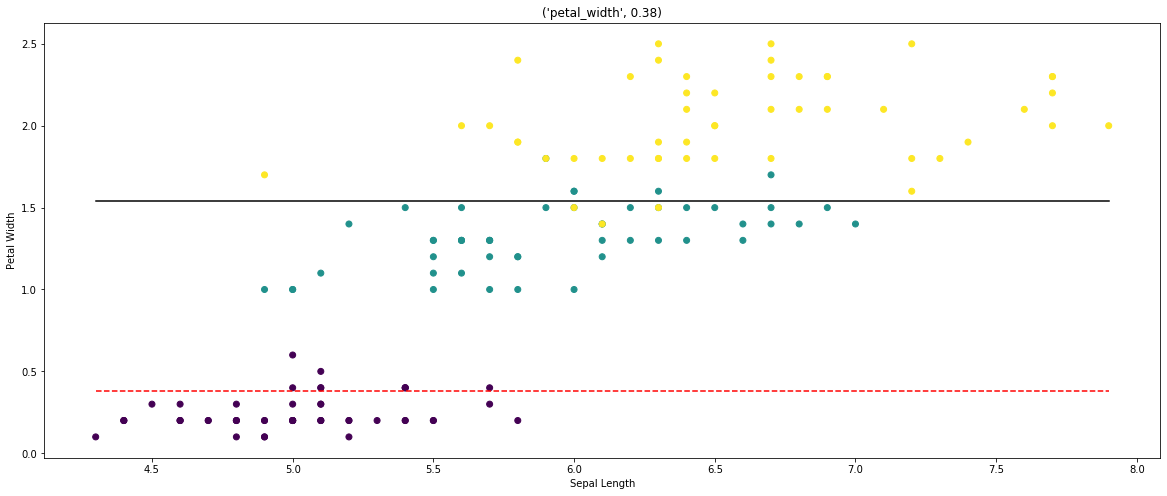

In [12]:
# Child 1

plt.title((cols[obj.children[0].head], obj.children[0].arg_value))

plt.scatter(df["sepal_length"], df["petal_width"], c=df["type"])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.plot([4.3, 7.9], [1.54, 1.54], "black")
plt.plot([4.3, 7.9], [0.38, 0.38], "r--")

plt.show()

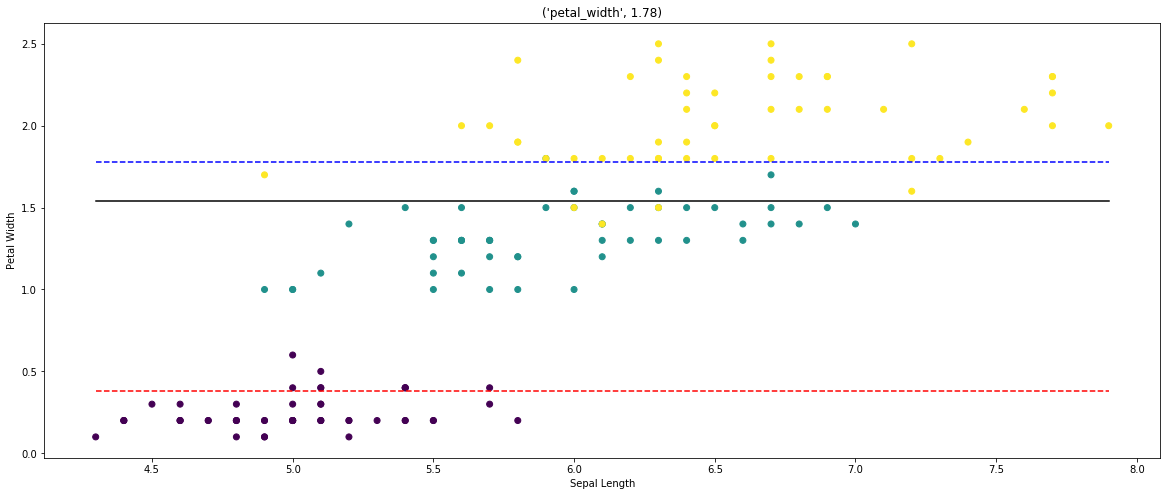

In [13]:
# Child 2

plt.title((cols[obj.children[1].head], obj.children[1].arg_value))

plt.scatter(df["sepal_length"], df["petal_width"], c=df["type"])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.plot([4.3, 7.9], [1.54, 1.54], "black")
plt.plot([4.3, 7.9], [0.38, 0.38], "r--")
plt.plot([4.3, 7.9], [1.78, 1.78], "b--")

plt.show()

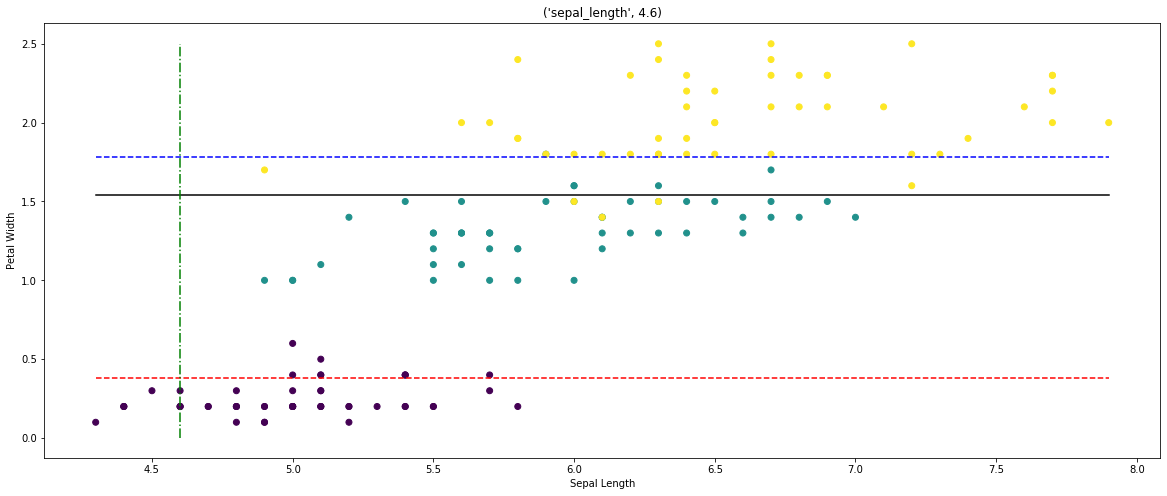

In [14]:
# GrandChild 11

plt.title((cols[obj.children[0].children[0].head], obj.children[0].children[0].arg_value))

plt.scatter(df["sepal_length"], df["petal_width"], c=df["type"])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.plot([4.3, 7.9], [1.54, 1.54], "black")
plt.plot([4.3, 7.9], [0.38, 0.38], "r--")
plt.plot([4.3, 7.9], [1.78, 1.78], "b--")
plt.plot([4.6, 4.6], [0, 2.5], "g-.")

plt.show()

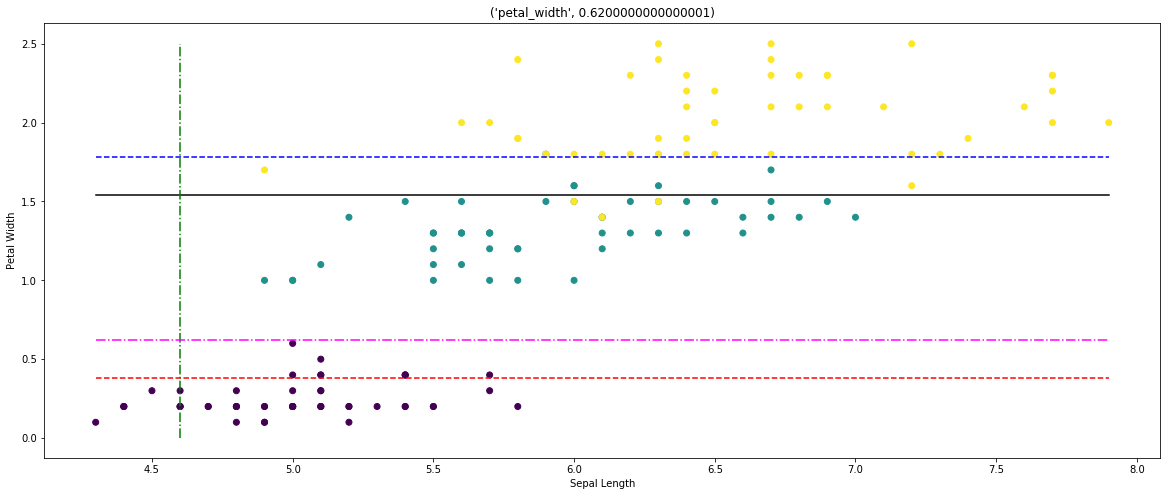

In [15]:
# GrandChild 12

plt.title((cols[obj.children[0].children[1].head], obj.children[0].children[1].arg_value))

plt.scatter(df["sepal_length"], df["petal_width"], c=df["type"])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.plot([4.3, 7.9], [1.54, 1.54], "black")
plt.plot([4.3, 7.9], [0.38, 0.38], "r--")
plt.plot([4.3, 7.9], [1.78, 1.78], "b--")
plt.plot([4.6, 4.6], [0, 2.5], "g-.")
plt.plot([4.3, 7.9], [0.62, 0.62], "magenta", linestyle="-.")

plt.show()

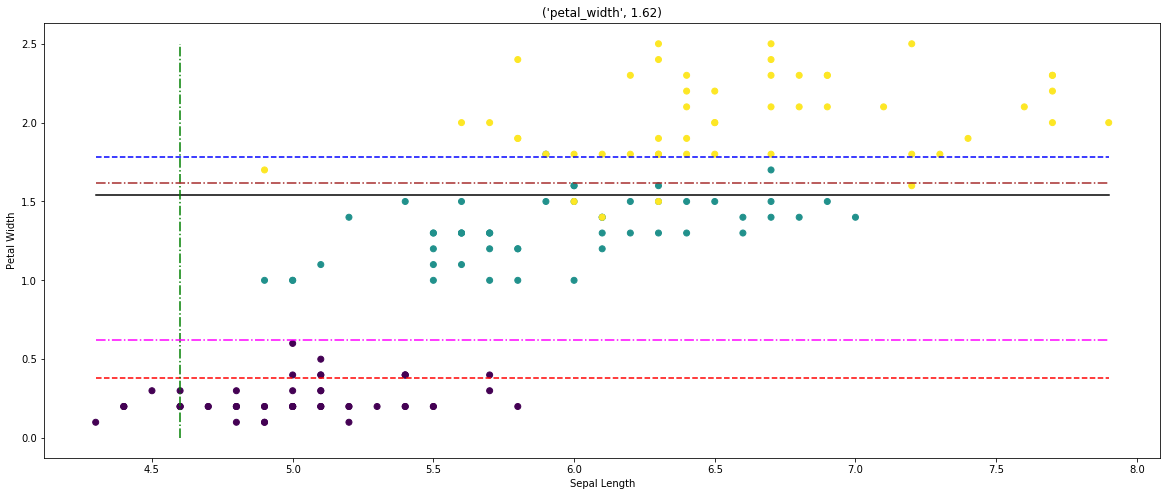

In [16]:
# GrandChild 21

plt.title((cols[obj.children[1].children[0].head], obj.children[1].children[0].arg_value))

plt.scatter(df["sepal_length"], df["petal_width"], c=df["type"])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.plot([4.3, 7.9], [1.54, 1.54], "black")
plt.plot([4.3, 7.9], [0.38, 0.38], "r--")
plt.plot([4.3, 7.9], [1.78, 1.78], "b--")
plt.plot([4.6, 4.6], [0, 2.5], "g-.")
plt.plot([4.3, 7.9], [0.62, 0.62], "magenta", linestyle="-.")
plt.plot([4.3, 7.9], [1.62, 1.62], "brown", linestyle="-.")

plt.show()

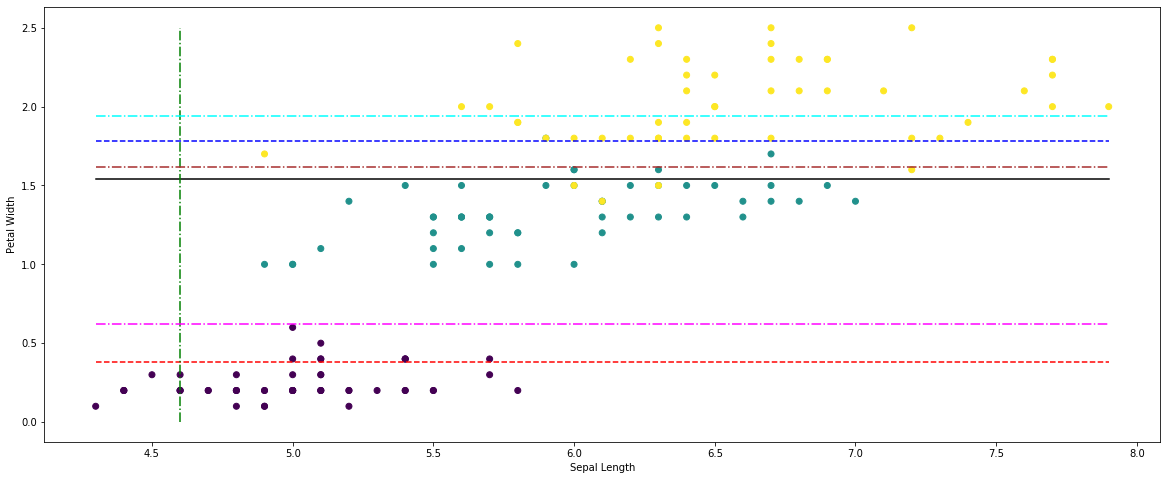

In [17]:
# GrandChild 22

plt.scatter(df["sepal_length"], df["petal_width"], c=df["type"])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.plot([4.3, 7.9], [1.54, 1.54], "black")
plt.plot([4.3, 7.9], [0.38, 0.38], "r--")
plt.plot([4.3, 7.9], [1.78, 1.78], "b--")
plt.plot([4.6, 4.6], [0, 2.5], "g-.")
plt.plot([4.3, 7.9], [0.62, 0.62], "magenta", linestyle="-.")
plt.plot([4.3, 7.9], [1.62, 1.62], "brown", linestyle="-.")
plt.plot([4.3, 7.9], [1.94, 1.94], "cyan", linestyle="-.")

plt.show()